In [3]:
!pip install opencv-python


In [13]:
import os
import numpy as np
from PIL import Image

def create_directories(output_dir):
    landslide_img_dir = os.path.join(output_dir, "landslide", "images")
    landslide_mask_dir = os.path.join(output_dir, "landslide", "masks")
    non_landslide_img_dir = os.path.join(output_dir, "non-landslide", "images")
    non_landslide_mask_dir = os.path.join(output_dir, "non-landslide", "masks")
    
    os.makedirs(landslide_img_dir, exist_ok=True)
    os.makedirs(landslide_mask_dir, exist_ok=True)
    os.makedirs(non_landslide_img_dir, exist_ok=True)
    os.makedirs(non_landslide_mask_dir, exist_ok=True)
    
    return landslide_img_dir, landslide_mask_dir, non_landslide_img_dir, non_landslide_mask_dir

def process_images(image_folder, mask_folder, output_folder, threshold=5000):
    landslide_img_dir, landslide_mask_dir, non_landslide_img_dir, non_landslide_mask_dir = create_directories(output_folder)
    
    image_files = [f for f in os.listdir(image_folder) if f.endswith(".png")]
    print(f"Processing {len(image_files)} images...")
    
    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        mask_path_default = os.path.join(mask_folder, image_file)
        mask_path_tif = os.path.join(mask_folder, os.path.splitext(image_file)[0] + ".png")

        # Check if either mask exists
        mask_path_default = os.path.join(mask_folder, image_file)
        mask_path_tif = os.path.join(mask_folder, os.path.splitext(image_file)[0] + ".png")

        # Assign the correct mask path if it exists
        if os.path.exists(mask_path_default):
            mask_path = mask_path_default
        elif os.path.exists(mask_path_tif):
            mask_path = mask_path_tif
        else:
            print(f"Mask not found for {image_file}, skipping...")
            continue

        # Load mask and compute landslide area
        mask = Image.open(mask_path).convert("L")
        mask_array = np.array(mask)
        landslide_area = np.sum(mask_array==0)  # Count non-zero pixels
        
        # Determine category and save image & mask
        image_name = os.path.splitext(image_file)[0] + ".png"
        mask_name = os.path.splitext(image_file)[0] + ".png"
        
        if landslide_area >= threshold:
            image_save_path = os.path.join(landslide_img_dir, image_name)
            mask_save_path = os.path.join(landslide_mask_dir, mask_name)
            category = "landslide_wenchan"
        else:
            continue
            # image_save_path = os.path.join(non_landslide_img_dir, image_name)
            # mask_save_path = os.path.join(non_landslide_mask_dir, mask_name)
            # category = "non-landslidewenchan"
        
        # Save image and mask
        image = Image.open(image_path).convert("RGB")
        image.save(image_save_path, "PNG")
        mask.save(mask_save_path, "PNG")
        
        print(f"Saved {image_file} as PNG to {category} folder")

# Example usage
image_folder = "/home/iml/Downloads/Remote_sensing/train_data/landslide_images"
mask_folder = "/home/iml/Downloads/Remote_sensing/landslide_images_masks"
output_folder = "/home/iml/Downloads/Remote_sensing/filtered_images"
thresh = 6000  # Adjust threshold as needed

process_images(image_folder, mask_folder, output_folder, threshold=thresh)


Processing 5079 images...
Saved Hokkaido0134.png as PNG to landslide_wenchan folder
Saved LongxiheSAT1375.png as PNG to landslide_wenchan folder
Saved LongxiheSAT1186.png as PNG to landslide_wenchan folder
Saved LongxiheSAT0504.png as PNG to landslide_wenchan folder
Saved LongxiheSAT0062.png as PNG to landslide_wenchan folder
Saved LongxiheSAT1209.png as PNG to landslide_wenchan folder
Saved jiuzzhaigou_0.5m_UVA1617.png as PNG to landslide_wenchan folder
Saved jiuzzhaigou_0.5m_UVA0004.png as PNG to landslide_wenchan folder
Saved Hokkaido0133.png as PNG to landslide_wenchan folder
Saved Lombok202.png as PNG to landslide_wenchan folder
Saved LongxiheSAT1628.png as PNG to landslide_wenchan folder
Saved jiuzzhaigou_0.5m_UVA1033.png as PNG to landslide_wenchan folder
Saved Hokkaido0480.png as PNG to landslide_wenchan folder
Saved Hokkaido0638.png as PNG to landslide_wenchan folder
Saved Hokkaido1524.png as PNG to landslide_wenchan folder
Saved jiuzzhaigou_0.5m_UVA0970.png as PNG to landslid

In [7]:
import os
import glob

directory = "/home/iml/Downloads/Remote_sensing/non_landslide_testing_data"
png_files = glob.glob(os.path.join(directory, "*.png"))

print(f"Number of PNG files: {len(png_files)}")


Number of PNG files: 128


In [2]:
!pip install torch torchvision pillow numpy

  Using cached filelock-3.17.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached jinja2-3.1.5-py3-none-any.whl.metadata (2.6 kB)
  Using cached fsspec-2025.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse

In [8]:
import torch
from torchvision import datasets, transforms, models

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize(           # Normalize with ImageNet stats
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Load the dataset
dataset = datasets.ImageFolder(root='/home/iml/Downloads/Remote_sensing/train_data', transform=transform)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)
# Load a pre-trained ResNet model
model = models.resnet18(pretrained=True)

# Modify the final layer for binary classification
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 2)  # 2 output classes: landslide and non-landslide

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        print("current loss is this : ",loss.item())
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Validation Loss: {val_loss/len(val_loader)}, Accuracy: {100 * correct / total}%")

/home/iml/Downloads/Remote_sensing/.conda/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/iml/Downloads/Remote_sensing/.conda/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


current loss is this :  0.7719568610191345
current loss is this :  1.074949026107788
current loss is this :  2.4205682277679443
current loss is this :  1.2264447212219238
current loss is this :  0.996244490146637
current loss is this :  0.7157060503959656
current loss is this :  0.8227885365486145
current loss is this :  0.8270589709281921
current loss is this :  0.487691730260849
current loss is this :  0.7866650819778442
current loss is this :  0.7494245171546936
current loss is this :  0.6675268411636353
current loss is this :  0.470289409160614
current loss is this :  0.463142454624176
current loss is this :  0.3810490071773529
current loss is this :  0.4463713765144348
current loss is this :  0.7545108795166016
current loss is this :  0.44666022062301636
current loss is this :  0.5848295092582703
current loss is this :  0.542803943157196
current loss is this :  0.7503843307495117
Epoch 1, Loss: 0.7803364850225902
Validation Loss: 1.271734709541003, Accuracy: 59.523809523809526%
cu

In [6]:
torch.save(model.state_dict(), 'landslide_classifier.pth')

In [9]:
# Load the saved model
model.load_state_dict(torch.load('landslide_classifier.pth'))
model.eval()

# Test on a single image
from PIL import Image

def predict_image(image_path):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0).to(device)
    output = model(image)
    _, predicted = torch.max(output, 1)
    return 'Landslide' if predicted.item() == 0 else 'Non-Landslide'

# Example usage
print(predict_image('/home/iml/Downloads/Remote_sensing/train_data/landslide_images/Hokkaido0030.png'))

Landslide


# Seleting random 500 images with diversity from dataset

In [4]:
import os
import shutil
import random
from collections import defaultdict

# Define paths

source_folder = "/home/iml/Downloads/Remote_sensing/train_data/non_landslide_images"
destination_folder = "/home/iml/Downloads/Remote_sensing/train_data/non_landslide_images"
os.makedirs(destination_folder, exist_ok=True)

# Read images and categorize based on initial names
class_images = defaultdict(list)

for filename in os.listdir(source_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Filter image files
        class_name = filename[0:5]  # Assuming class is determined by initial name before '_'
        class_images[class_name].append(filename)

# Ensure at least one image per class
selected_images = []
num_required = 100

# Shuffle and distribute images
all_images = []
for cls, images in class_images.items():
    random.shuffle(images)
    all_images.extend(images)

random.shuffle(all_images)

# Select up to 500 images while maintaining class diversity
selected_images = all_images[:num_required]

# Copy selected images to new folder
for img in selected_images:
    shutil.move(os.path.join(source_folder, img), os.path.join(destination_folder, img))

print(f"Successfully copied {len(selected_images)} images to {destination_folder}")


Successfully copied 100 images to /home/iml/Downloads/Remote_sensing/testing_data


In [6]:
import os
import shutil

testing_data_dir = '/home/iml/Downloads/Remote_sensing/testing_data'
filtered_images_dir = '/home/iml/Downloads/Remote_sensing/filtered_images/landslide/images'
destination_dir = '/home/iml/Downloads/Remote_sensing/testing_landslide_images'

# Get the list of images in the testing_data directory
testing_images = os.listdir(testing_data_dir)

# Get the list of images in the filtered_images directory
filtered_images = os.listdir(filtered_images_dir)

# Find the common images in both directories
common_images = set(testing_images) & set(filtered_images)

# Move the common images to the destination directory
for image in common_images:
    image_path = os.path.join(testing_data_dir, image)
    destination_path = os.path.join(destination_dir, image)
    shutil.move(image_path, destination_path)

# Return the names of the common images
common_image_names = list(common_images)
common_image_names

['LongxiheSAT0324.png',
 'LongxiheSAT0719.png',
 'LongxiheSAT0827.png',
 'jiuzzhaigou_0.5m_UVA0889.png',
 'jiuzzhaigou_0.5m_UVA1486.png',
 'LongxiheSAT1191.png',
 'LongxiheSAT0616.png',
 'Hokkaido1112.png',
 'jiuzzhaigou_0.5m_UVA0649.png',
 'jiuzzhaigou_0.5m_UVA1710.png',
 'LongxiheSAT0274.png',
 'jiuzzhaigou_0.5m_UVA1590.png',
 'LongxiheSAT1651.png',
 'Hokkaido0601.png',
 'Hokkaido1523.png',
 'Hokkaido0415.png',
 'Hokkaido0479.png',
 'Hokkaido0693.png',
 'Hokkaido0374.png',
 'Hokkaido0795.png',
 'jiuzzhaigou_0.5m_UVA1744.png',
 'jiuzzhaigou_0.5m_UVA0819.png',
 'LongxiheSAT0975.png',
 'jiuzzhaigou_0.5m_UVA0338.png',
 'LongxiheSAT1626.png',
 'wenchuan146.png',
 'LongxiheSAT0443.png',
 'Hokkaido0254.png',
 'LongxiheSAT0790.png',
 'jiuzzhaigou_0.5m_UVA0486.png',
 'jiuzzhaigou_0.5m_UVA1653.png',
 'LongxiheSAT1734.png',
 'jiuzzhaigou_0.5m_UVA0944.png',
 'jiuzzhaigou_0.5m_UVA1241.png',
 'Hokkaido0652.png',
 'jiuzzhaigou_0.5m_UVA0592.png',
 'LongxiheSAT0654.png',
 'Hokkaido0089.png',
 'Longxi

In [7]:
import h5py
import matplotlib.pyplot as plt

# Open the HDF5 file
file_path = "/home/iml/Downloads/Remote_sensing/Land4SlideSense/TestData/img/image_1.h5"  # Replace with the actual file path
with h5py.File(file_path, "r") as x_train:
    x_train = x_train
    # print("Keys in the HDF5 file:", list(h5f.keys()))
    
    # # Load datasets
    # x_train = h5f["x_train"][:]  # Assuming 'x_train' is the feature dataset
    # y_train = h5f["y_train"][:]  # Assuming 'y_train' is the label dataset

# Check the shape of the dataset
# print(f"y_train shape: {y_train.shape}")

# Select an image index
img = 1545  # Ensure this index is within range
x_train

# Plot the different representations
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask (Label)")

# Display the images
ax1.imshow(x_train[img, :, :, 0:3])  # RGB bands
ax2.imshow(x_train[img, :, :, 3], cmap="viridis")  # NDVI
ax3.imshow(x_train[img, :, :, 4], cmap="viridis")  # Slope
ax4.imshow(x_train[img, :, :, 5], cmap="terrain")  # Elevation
# ax5.imshow(y_train[img, :, :, 0], cmap="gray")  # Label (mask)

plt.show()


AttributeError: 'File' object has no attribute 'shape'

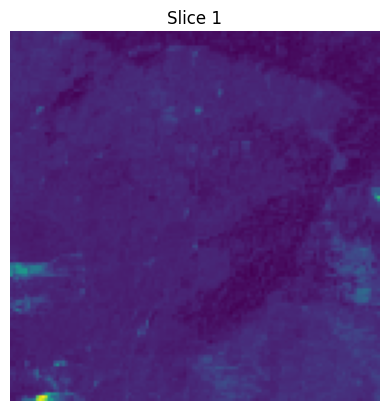

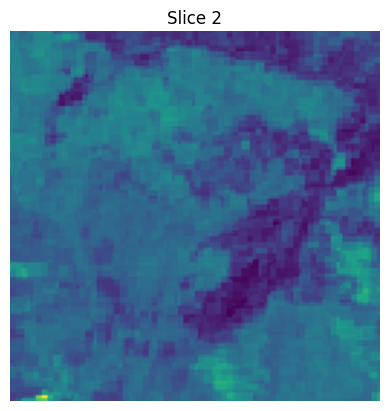

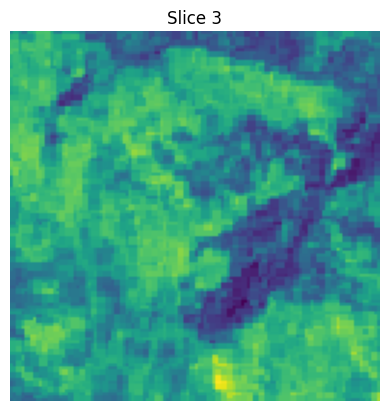

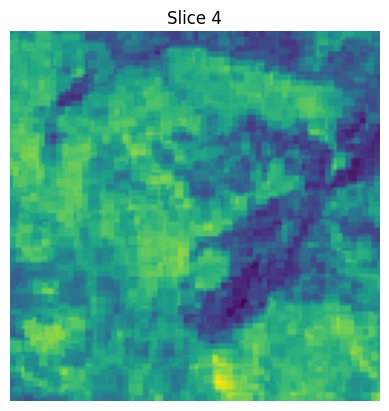

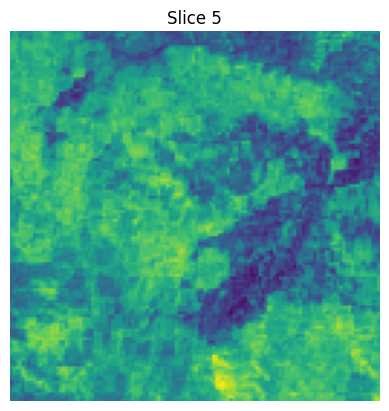

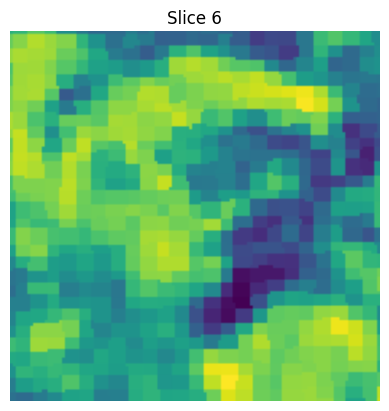

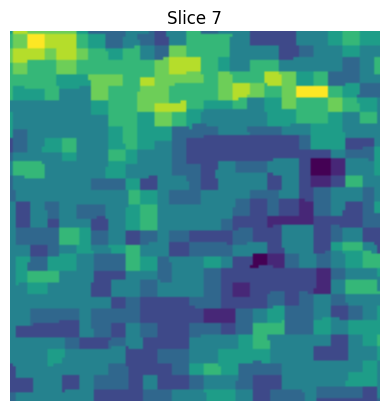

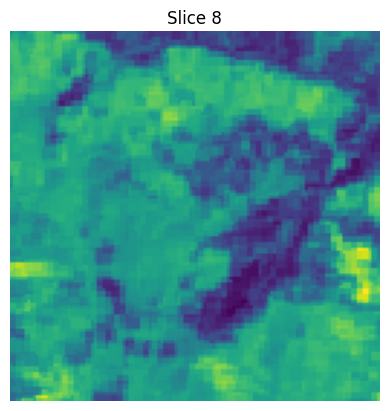

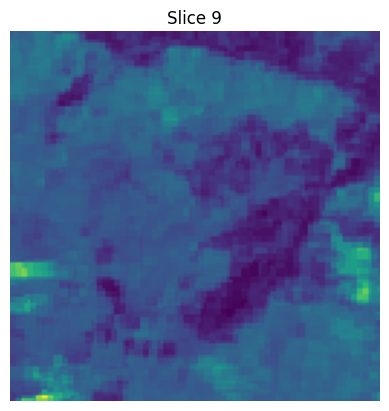

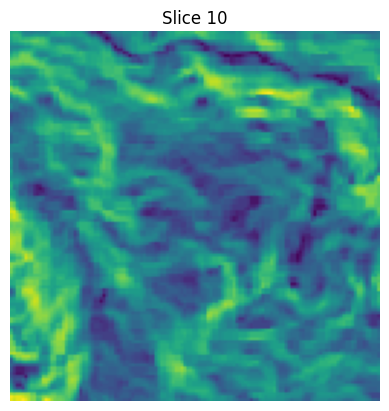

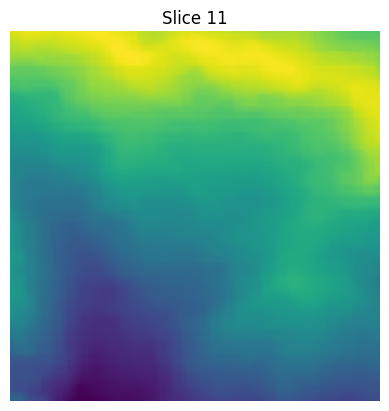

IndexError: Index (14) out of range for (0-13)

In [15]:

# Open the .h5 file in read mode
file_path = "/home/iml/Downloads/Remote_sensing/Land4SlideSense/TestData/img/image_1.h5"  # Replace with your actual file path
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Ensure the dataset has at least 3 images and assumes RGB is in the first 3 channels
with h5py.File(file_path, "r") as f:
    dataset = f["img"]  # Load the dataset
    
    # Check the number of slices
    num_slices = dataset.shape[2]
    
    # Display each slice
    for i in range(num_slices):
        plt.imshow(dataset[:, :, i+3])  # Display in grayscale
        plt.title(f"Slice {i+1}")
        plt.axis("off")  # Hide axes
        plt.show()



In [4]:
!pip install h5py
!pip install matplotlib


  Using cached contourpy-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 5.8 MB/s eta 0:00:00a 0:00:01
Using cached contourpy-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (326 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.9 MB)
Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
